# Working title

#### STAT 201 Group Project Proposal ####
##### Group 17 - *Janice Chan, Ena Gupta, Gael Hernandez Palmer*

### Introduction

...

### Preliminary Results

In [7]:
# Load packages
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)
library(ggplot2)

In [8]:
# set seed for reproducibility
set.seed(1234)

# HEART DISEASE DATA (Compiled)
# load data

heart_disease_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                                 delim = ",",
                                 col_names = FALSE) %>%
    transmute(age = X1, # clean data; renaming
              sex = factor(X2) %>%
                  fct_recode(female = "0",
                             male = "1"),
              chest_pain = factor(X3) %>%
                  fct_recode(typical_angina = "1",
                             atypical_angina = "2",
                             nonanginal_pain = "3",
                             asymptomatic = "4"),
              resting_bp = X4,
              cholesterol = X5,
              bldsg_over120 = factor(X6) %>%
                  fct_recode(no = "0",
                             yes = "1"),
              rest_ecg = factor(X7) %>%
                  fct_recode(normal = "0",
                             stt_abnormal = "1",
                             lv_hyptroph = "2"),
              max_hr = X8,
              ex_angina = factor(X9) %>%
                  fct_recode(no = "0",
                             yes = "1"),
              old_peak = X10,
              slope = factor(X11) %>%
                  fct_recode(upslope = "1",
                             flat = "2",
                             downslope = "3"),
              flr_ves = X12,
              thalassemia = factor(X13) %>%
                  fct_recode(normal = "3.0",
                             fxd_def = "6.0",
                             rev_def = "7.0"),
              disease = factor(X14) %>% 
                 fct_recode(no = "0", 
                            yes = "1",
                            yes = "2",
                            yes = "3",
                            yes = "4")) %>%
    select(age, sex, disease) %>% # select relevant attributes
    filter(disease == "yes") # filter for those diagnosed with heart disease
              
head(heart_disease_data)
# Heart disease data for male patients
male_diseased = heart_disease_data %>%
    filter(sex == "male")

# Heart disease data for female patients
female_diseased = heart_disease_data %>%
    filter(sex == "female")

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,disease
<dbl>,<fct>,<fct>
67,male,yes
67,male,yes
62,female,yes
63,male,yes
53,male,yes
56,male,yes


In [9]:
# summarize data (estimates)

# Average age in male patients
mean_age_male = mean(male_diseased$age) %>%
    round(digits = 0)

# Average age in female patients
mean_age_female = mean(female_diseased$age) %>%
    round(digits = 0)

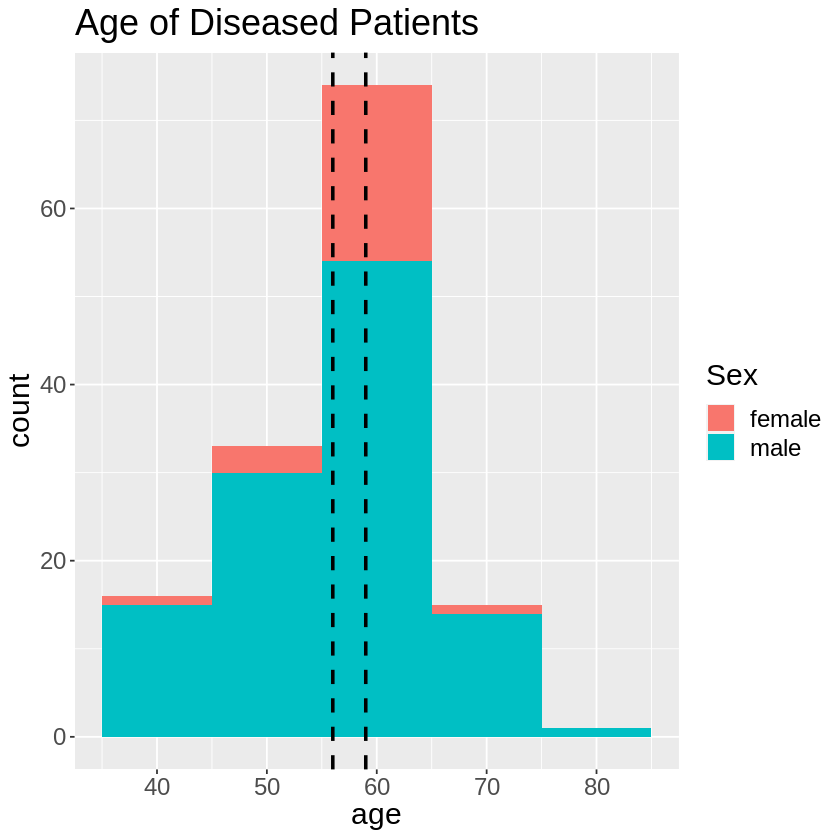

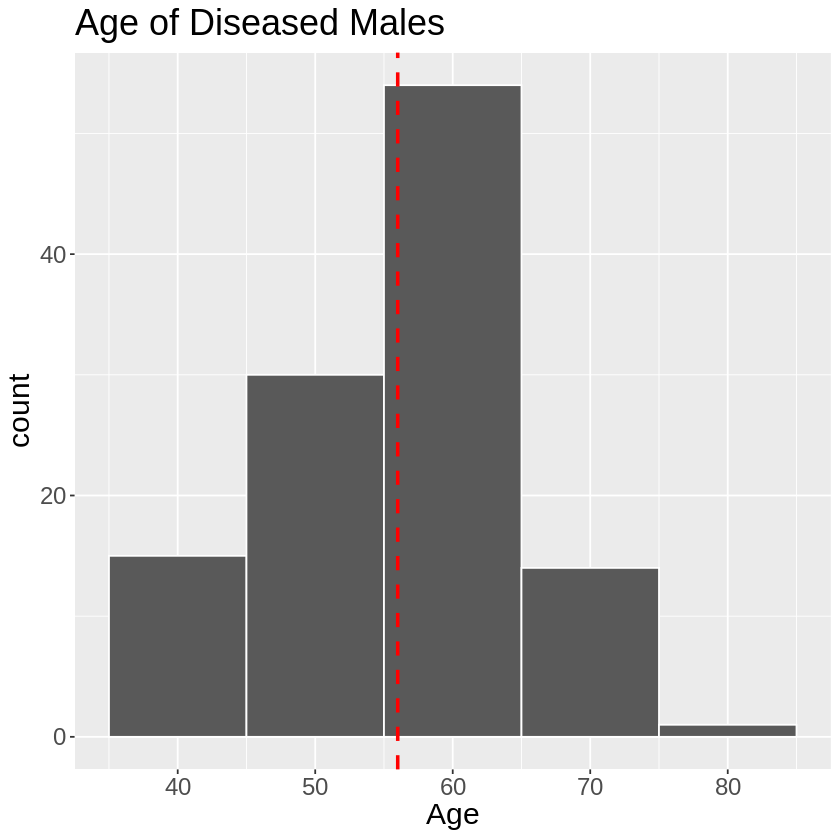

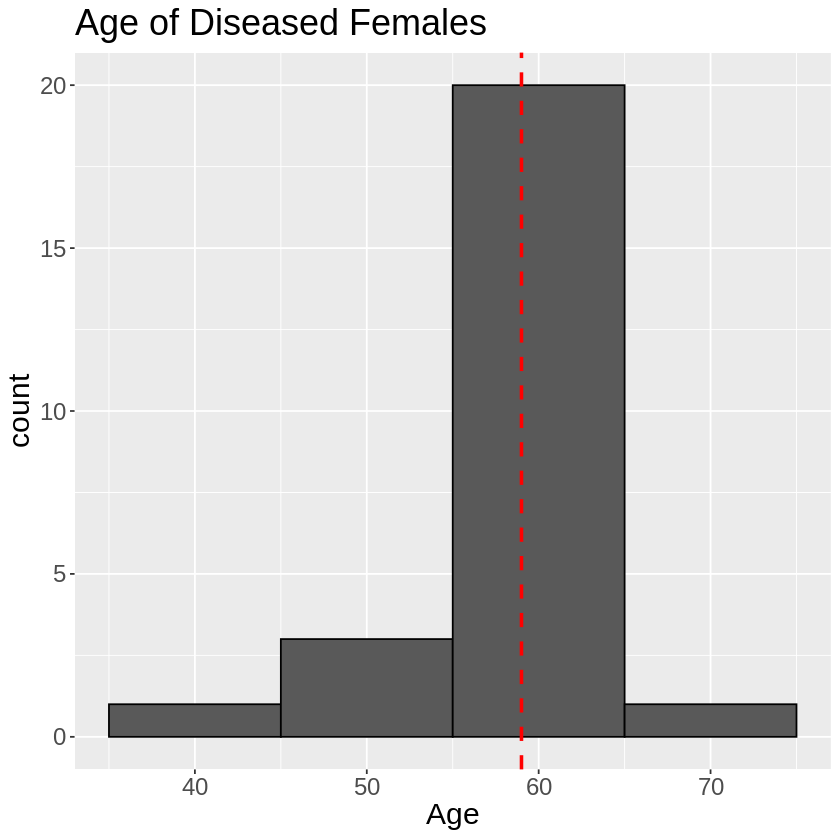

In [12]:
# plot raw data

# Both male and female patients
age_plot <- heart_disease_data %>%
    ggplot(aes(x = age, fill = sex)) +
    geom_histogram(binwidth = 10) +
    geom_vline(xintercept = mean_age_male, linetype = "dashed", size = 1) +
    geom_vline(xintercept = mean_age_female, linetype = "dashed", size = 1) +
    labs(title = "Age of Diseased Patients",
         xlab = "Age",
         fill = "Sex") +
    theme(text = element_text(size = 18))

age_plot

# Male
male_diseased_plot <- male_diseased %>%
    ggplot(aes(x = age)) + 
    geom_histogram(binwidth = 10, color = "white") + 
    geom_vline(xintercept = mean_age_male, linetype = "dashed", size = 1, color = "red") +
    xlab("Age") +
    ggtitle("Age of Diseased Males") +
    theme(text = element_text(size = 18))

male_diseased_plot

# Female
female_diseased_plot <- female_diseased %>%
    ggplot(aes(x = age)) + 
    geom_histogram(binwidth = 10, color = "black") + 
    geom_vline(xintercept = mean_age_female, linetype = "dashed", size = 1, color = "red") +
    xlab("Age") +
    ggtitle("Age of Diseased Females") +
    theme(text = element_text(size = 18))

female_diseased_plot

### Methods

...

### References

...